<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW#1 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (15%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.

<Ответ>
* При $\alpha$ близком к единице, мы ориентируемся на последние собития и быстро забываем историю, при $\alpha$ близком к нулю, мы наоборот медленно забываем историю

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

<Ответ>
* Если тренд меняется плавно, то мы можем полагаться на историю и медленно забывать предыдущие значения, то есть $\alpha_2$ должно быть близко к нулю
* Если тренд меняется резко, то мы можем брать в расчёт только последние события, поэтому $\alpha_2$ должно быть близко к единице

**Вопрос 3**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда в модели Тейла-Вейджа (период сезонность обозначается $p$):
$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,
    $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,

<Ответ>

<img src="theory3.jpg">
**Вопрос 4**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с линейным затухающим трендом (WS with additive damped trend):

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$,
   
Скрытые компоненты ВР согласно модели в рекуррентной форме записываются:
    $$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$,
    $$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$


<Ответ>
<img src="theory4.jpg">
-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center"> Practice</h1>
#  1. reading data (5%)

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)

In [4]:
# start with this code
import pandas as pd
import numpy as np
import math
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline

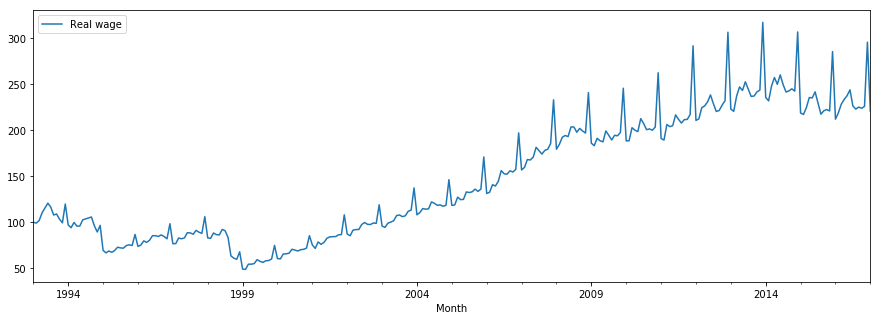

In [5]:
wage = pd.read_csv('monthly-wage.csv',  sep=';', decimal='.', index_col= 0, parse_dates=True, dayfirst=True)

# Put your code below
wage.plot(figsize=(15,5))

# 2. Build the Forecast with  IES (5%)

You need to apply IES model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with SES $\alpha=.1$.
* 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

## 1) Search for the optimal $\alpha$ 

#### Подыскиваем оптимальное значение $\alpha$ как на семинаре, испльзуя функции из unit.py

In [6]:
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
IESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':5} for alpha in ALPHA]
FRC_WAGE_IES = BuildForecast(h=1, ts=wage, AlgName='InitExponentialSmoothing', AlgTitle='IES', ParamsArray = IESParamsArray)

In [7]:
# compare IES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE_IES.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE_IES[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

IES {'alpha': 0.4, 'AdaptationPeriod': 5}     0.058959
IES {'alpha': 0.7, 'AdaptationPeriod': 5}     0.061867
IES {'alpha': 0.2, 'AdaptationPeriod': 5}     0.066311
IES {'alpha': 0.15, 'AdaptationPeriod': 5}    0.074440
IES {'alpha': 0.1, 'AdaptationPeriod': 5}     0.091834
IES {'alpha': 0.05, 'AdaptationPeriod': 5}    0.142196
IES {'alpha': 0.01, 'AdaptationPeriod': 5}    0.344752
dtype: float64

## 2) draw the forecast with optimial value $\alpha $

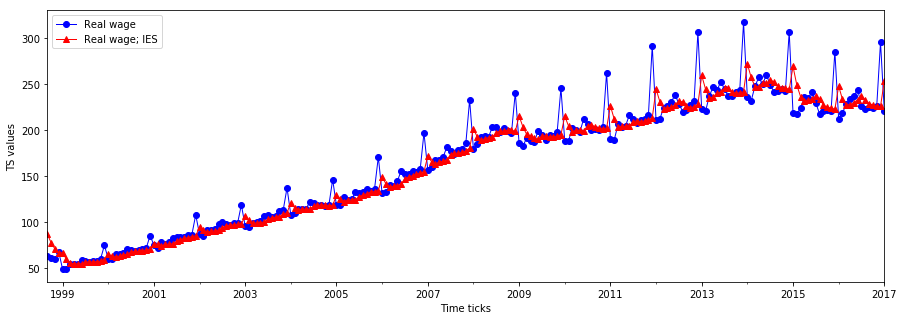

In [8]:
algNameIES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE_IES[algNameIES].loc['1998-09-01':'2017-01-01']
               , ts_num=1, alg_title='IES')

** Question**
    * Does SES follow to the TS components?
    
#### Ответ:
* Видно, что данная модель не очень подходит для прогрнозирования данного ряда, потому что ряд не стационарный, тут есть тренд и сезонность, наша же модель не может "поймать" годичную сезонность ряда и тренд. Также это видно по оптимальному значению $\alpha$ - 0.4, которое указывает на то, что ряд не стационарный и применять данную модель для прогнозирования не очень хорошо.

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [9]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE_IES[algNameIES].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.062764
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

In [13]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params, l_init=np.NaN):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= l_init
    s= [np.NaN]*p
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = 0
 
            if math.isnan(s[cntr % p]):
                s[cntr % p] = 0
            
            l_prev = l
            l = alpha*(x[cntr] - s[cntr % p])+(1-alpha)*l_prev
            s[cntr % p] = delta*(x[cntr]-l_prev)+(1-delta)*s[cntr % p]
            
        FORECAST[cntr+h] = l + s[(cntr+h) % p]
    return FORECAST

In [14]:
def BuildForecast(h, ts, AlgName, AlgTitle, ParamsArray, step='M'):
    FRC_TS = dict()
    for p in ParamsArray:
        frc_horizon = pd.date_range(ts.index[-1], periods=h+1, freq=step)[1:]
        frc_ts = pd.DataFrame(index = ts.index.append(frc_horizon), columns = ts.columns)

        for cntr in ts.columns:
            frc_ts[cntr] = eval(AlgName)(ts[cntr], h, p)

    #         frc_ts.columns = frc_ts.columns+('%s %s' % (AlgTitle, p))
        FRC_TS['%s %s' % (AlgTitle, p)] = frc_ts
    return FRC_TS

In [15]:
%%time
# Put your code here
DELTA = [0.1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005]
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
WESParamsArray = [{'alpha':alpha, 'delta':delta, 'seasonality_period': 12} 
                  for delta in DELTA 
                     for alpha in ALPHA]
FRC_WAGE_WES=BuildForecast(h=1, ts=wage, AlgName = 'WintersExponentialSmoothing', AlgTitle='WES', ParamsArray = WESParamsArray)

Wall time: 838 ms


In [16]:
# compare IES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE_WES.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE_WES[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()[:10]

WES {'alpha': 0.7, 'delta': 0.1, 'seasonality_period': 12}       0.038950
WES {'alpha': 0.4, 'delta': 0.1, 'seasonality_period': 12}       0.041712
WES {'alpha': 0.2, 'delta': 0.1, 'seasonality_period': 12}       0.053174
WES {'alpha': 0.4, 'delta': 0.01, 'seasonality_period': 12}      0.056206
WES {'alpha': 0.4, 'delta': 0.005, 'seasonality_period': 12}     0.057538
WES {'alpha': 0.7, 'delta': 0.01, 'seasonality_period': 12}      0.057967
WES {'alpha': 0.4, 'delta': 0.001, 'seasonality_period': 12}     0.058669
WES {'alpha': 0.4, 'delta': 0.0005, 'seasonality_period': 12}    0.058813
WES {'alpha': 0.4, 'delta': 0.0001, 'seasonality_period': 12}    0.058930
WES {'alpha': 0.4, 'delta': 5e-05, 'seasonality_period': 12}     0.058944
dtype: float64

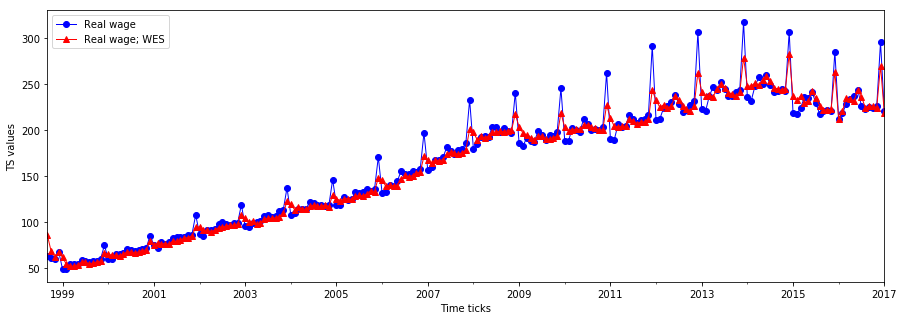

In [17]:
algNameWES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE_WES[algNameWES].loc['1998-09-01':'2017-01-01']
               , ts_num=1, alg_title='WES')

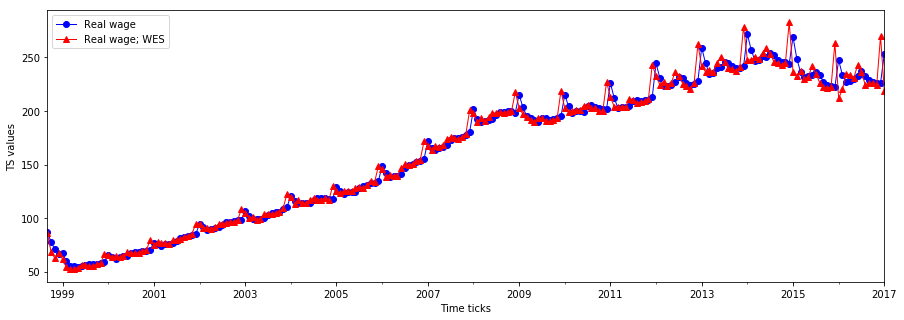

In [18]:
algNameWES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(FRC_WAGE_IES[algNameIES].loc['1998-09-01':'2017-01-01'], FRC_WAGE_WES[algNameWES].loc['1998-09-01':'2017-01-01']
               , ts_num=1, alg_title='WES')

In [39]:
print(FRC_WAGE_WES == FRC_WAGE_IES)

False


# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [40]:
# Put your code here
###################### Theil-Wage model #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    gamma <scalar in [0,1]> - seasonality smoothing parameter
#    beta <scalar in [0,1]> - trend smoothing parameter

def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= np.NaN
    s= [np.NaN]*p
    b= np.NaN 
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = 0
 
            if math.isnan(s[cntr % p]):
                s[cntr % p] = 0
            
            if math.isnan(b):
                b = 0
            
            l_prev = l
            b_prev = b
            l = alpha*(x[cntr] - s[cntr % p])+(1-alpha)*(l_prev+b_prev)
            s[cntr % p] = gamma*(x[cntr]-l_prev)+(1-gamma)*s[cntr % p]
            b = beta*(l-l_prev)+(1-beta)*b_prev
            
        FORECAST[cntr+h] = l + s[(cntr+h) % p]
    return FORECAST


In [41]:
%%time
# Put your code here
GAMMA = [0.1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005]
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
BETA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
THWESParamsArray = [{'alpha':alpha, 'gamma':gamma, 'beta':beta, 'seasonality_period': 12} 
                  for gamma in GAMMA 
                     for alpha in ALPHA
                       for beta in BETA]
FRC_WAGE_THWES=BuildForecast(h=1, ts=wage, AlgName = 'TheilWageExponentialSmoothing', AlgTitle='THWES', 
                             ParamsArray = THWESParamsArray)

Wall time: 5.97 s


In [42]:
# compare IES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE_THWES.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE_THWES[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()[:10]

THWES {'alpha': 0.7, 'gamma': 0.1, 'beta': 0.01, 'seasonality_period': 12}    0.038650
THWES {'alpha': 0.7, 'gamma': 0.1, 'beta': 0.05, 'seasonality_period': 12}    0.039063
THWES {'alpha': 0.7, 'gamma': 0.1, 'beta': 0.1, 'seasonality_period': 12}     0.039268
THWES {'alpha': 0.7, 'gamma': 0.1, 'beta': 0.15, 'seasonality_period': 12}    0.039464
THWES {'alpha': 0.7, 'gamma': 0.1, 'beta': 0.2, 'seasonality_period': 12}     0.039636
THWES {'alpha': 0.7, 'gamma': 0.1, 'beta': 0.7, 'seasonality_period': 12}     0.039759
THWES {'alpha': 0.7, 'gamma': 0.1, 'beta': 0.4, 'seasonality_period': 12}     0.039884
THWES {'alpha': 0.4, 'gamma': 0.1, 'beta': 0.01, 'seasonality_period': 12}    0.041005
THWES {'alpha': 0.4, 'gamma': 0.1, 'beta': 0.05, 'seasonality_period': 12}    0.041741
THWES {'alpha': 0.4, 'gamma': 0.1, 'beta': 0.1, 'seasonality_period': 12}     0.041952
dtype: float64

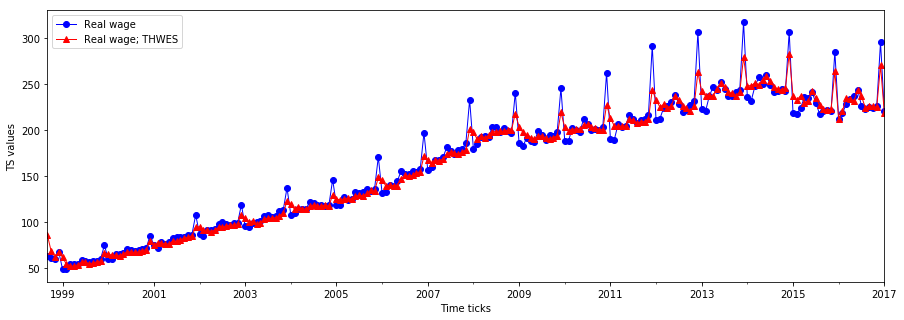

In [43]:
algNameTHWES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE_THWES[algNameTHWES].loc['1998-09-01':'2017-01-01']
               , ts_num=1, alg_title='THWES')

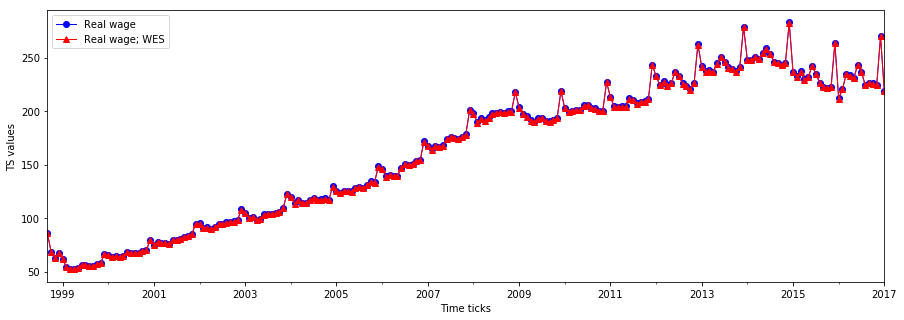

In [44]:
algNameTHWES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(FRC_WAGE_THWES[algNameTHWES].loc['1998-09-01':'2017-01-01'], FRC_WAGE_WES[algNameWES].loc['1998-09-01':'2017-01-01']
               , ts_num=1, alg_title='WES')

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

In [45]:
# Put your code here
###################### Theil-Wage model #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    beta <scalar in [0,1]> - seasonality smoothing parameter

def WintersModel(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= np.NaN
    s= [np.NaN]*p
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = 1
 
            if math.isnan(s[cntr % p]):
                s[cntr % p] = 1
            
            
            l_prev = l
            l = alpha*(x[cntr]/s[cntr % p])+(1-alpha)*l_prev
            s[cntr % p] = beta*(x[cntr]/l_prev)+(1-beta)*s[cntr % p]
            
        FORECAST[cntr+h] = l * s[(cntr+h) % p]
    return FORECAST


In [46]:
%%time
# Put your code here
BETA = [0.1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005]
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01, 0.3]
WMParamsArray = [{'alpha':alpha,'beta':beta, 'seasonality_period': 12} 
                 for alpha in ALPHA
                   for beta in BETA]
FRC_WAGE_WM=BuildForecast(h=1, ts=wage, AlgName = 'WintersModel', AlgTitle='WM', 
                             ParamsArray = WMParamsArray)

Wall time: 1.01 s


In [47]:
# compare IES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE_WM.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE_WM[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()[:10]

WM {'alpha': 0.4, 'beta': 5e-05, 'seasonality_period': 12}     0.059348
WM {'alpha': 0.4, 'beta': 0.0001, 'seasonality_period': 12}    0.059744
WM {'alpha': 0.3, 'beta': 5e-05, 'seasonality_period': 12}     0.060871
WM {'alpha': 0.3, 'beta': 0.0001, 'seasonality_period': 12}    0.061266
WM {'alpha': 0.7, 'beta': 5e-05, 'seasonality_period': 12}     0.062092
WM {'alpha': 0.7, 'beta': 0.0001, 'seasonality_period': 12}    0.062315
WM {'alpha': 0.4, 'beta': 0.0005, 'seasonality_period': 12}    0.062912
WM {'alpha': 0.7, 'beta': 0.0005, 'seasonality_period': 12}    0.064063
WM {'alpha': 0.3, 'beta': 0.0005, 'seasonality_period': 12}    0.064813
WM {'alpha': 0.4, 'beta': 0.001, 'seasonality_period': 12}     0.066693
dtype: float64

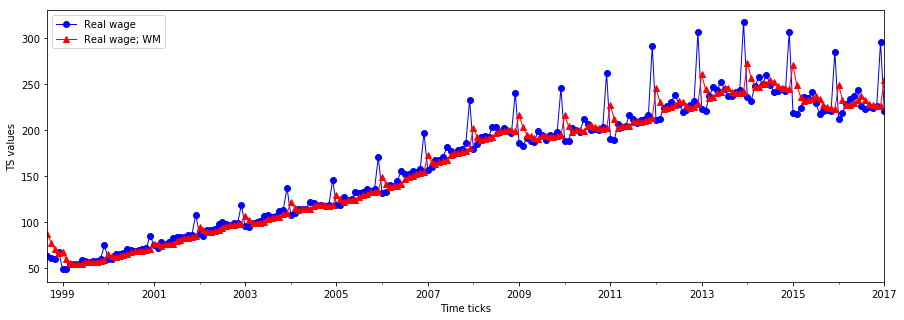

In [48]:
algNameWM = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE_WM[algNameWM].loc['1998-09-01':'2017-01-01']
               , ts_num=1, alg_title='WM')